In [1]:
# Imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

aDFLast20yr = pd.read_csv("aDFLast20yr.csv")
aDFNext20yr = pd.read_csv("aDFNext20yr.csv")
MercuryLast50yr = pd.read_csv("MercuryLast50yr.csv")
VenusLast50yr = pd.read_csv("VenusLast50yr.csv")
EarthLast50yr = pd.read_csv("EarthLast50yr.csv")
MarsLast50yr = pd.read_csv("MarsLast50yr.csv")

In [2]:
#Defining Functions
def CleanData(df):
    #Renaming
    df = df.rename(columns={"des":"Name", "orbit_id":"Orbit ID", "cd":"Date", "dist":"Nominal Distance", "t_sigma_f": "Date Uncertainty","v_rel":"Relative Speed", "body":"Planet"})
    #Creating specific Date Columns
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'], df['Month'], df['Day'] = df['Date'].dt.year, df['Date'].dt.month, df['Date'].dt.day
    #Removing Dates with high uncertainty
    df['Date Uncertainty'] = df['Date Uncertainty'].replace({':':'', '_':'','<':'','>':''}, regex=True)
    df['Date Uncertainty'] = pd.to_numeric(df['Date Uncertainty'])
    df = df[df['Date Uncertainty'] < 50000]
    return df

def TotCntByPlanetType(df):
    df = CleanData(df)
    df = df.drop(columns=['Name', 'Orbit ID', 'jd', 'Date', 'Nominal Distance','dist_min', 'dist_max', 'Relative Speed', 'v_inf', 'Date Uncertainty', 'h', 'fullname', 'Year', 'Month', 'Day'])
    df = df["Planet"].value_counts().rename_axis('Planets').to_frame('Occurrences')
    #Type
    df.loc[(df.index == "Mercury")|(df.index == "Venus")|(df.index == "Earth")|(df.index == "Mars"), 'Planet Type'] = "Inner"
    df.loc[(df.index == "Jupiter")|(df.index == "Saturn")|(df.index == "Uranus")|(df.index == "Neptune"), 'Planet Type'] = "Outer"
    return df
def TotCntByPlanet(df):
    df = CleanData(df)
    df = df.drop(columns=['Name', 'Orbit ID', 'jd', 'Date', 'Nominal Distance','dist_min', 'dist_max', 'Relative Speed', 'v_inf', 'Date Uncertainty', 'h', 'fullname', 'Year', 'Month', 'Day'])
    df = df["Planet"].value_counts().rename_axis('Planets').to_frame('Occurrences')
    return df
def graphbyPlanet(df, title, imageName):
    Graphdf = TotCntByPlanet(df)
    Graphdf = Graphdf[~Graphdf.index.isin(['Moon','Jupiter','Saturn','Uranus','Neptune'])]

    #Graphing with PyPlot
    plt.bar(Graphdf.index, Graphdf['Occurrences'], width=.5, color='green')
    #Labels
    plt.title("Close Approaches Recorded by Planet within 30 lunar distances")
    plt.xlabel("Planets")
    plt.ylabel("Count")
    #Style Ticks
    xVal = np.arange(len(Graphdf.index))
    plt.xticks(xVal, rotation=45, ha='right')
    #Style Graph
    ax = plt.gca()
    ax.set_facecolor('xkcd:black')
    ax.grid(axis='y')
    ax.set_ylim([0,max(Graphdf['Occurrences']+1000)])
    ax.figure.savefig(f'Images/{imageName}.png')
    
def graphbyPlanetCompare(df1, df2, title, imageName):
    df1 = TotCntByPlanet(df1)
    df2 = TotCntByPlanet(df2)
    Graphdf = df1.merge(df2, how='outer', on='Planets')
    Graphdf = Graphdf.rename(columns={"Occurrences_x":"Previous Occurrences", "Occurrences_y":"Upcoming Occurrences"})
    Graphdf = Graphdf[~Graphdf.index.isin(['Moon','Jupiter','Saturn','Uranus','Neptune'])]
    #Graphing with PyPlot
    Graphdf.plot(kind='bar')
    #Labels
    plt.title(title)
    plt.xlabel("Planets")
    plt.ylabel("Count")
    #Style Ticks
    xVal = np.arange(len(Graphdf.index))
    plt.xticks(xVal, rotation=45, ha='right')
    #Style Graph
    ax = plt.gca()
    ax.set_facecolor('xkcd:black')
    ax.grid(axis='y')
    ax.set_ylim([0,max(Graphdf['Previous Occurrences']+1000)])
    ax.figure.savefig(f'Images/{imageName}.png')
    
def graphbyPlanetType(df, title, imageName):
    Graphdf=TotCntByPlanetType(df)
    Graphdf = Graphdf[~Graphdf.index.isin(['Moon'])]
    Graphdf = pd.DataFrame(Graphdf.groupby('Planet Type')['Occurrences'].sum().rename_axis('Planets').to_frame('Occurrences'))

    #Graphing with PyPlot
    plt.bar(Graphdf.index, Graphdf['Occurrences'], width=.5, color='green')
    #Labels
    plt.title(title)
    plt.xlabel("Planets")
    plt.ylabel("Count")
    #Style Ticks
    xVal = np.arange(len(Graphdf.index))
    plt.xticks(xVal, rotation=45, ha='right')
    #Style Graph
    ax = plt.gca()
    ax.set_facecolor('xkcd:black')
    ax.grid(axis='y')
    ax.set_ylim([0,max(Graphdf['Occurrences']+1000)])
    ax.figure.savefig(f'Images/{imageName}.png')
def PlanetOcc(df, title, imageName):
    #Clean
    Graphdf=CleanData(df)
    Graphdf = Graphdf.drop(columns=['Name', 'Orbit ID', 'jd', 'Date', 'Nominal Distance','dist_min', 'dist_max', 'Relative Speed', 'v_inf', 'Date Uncertainty', 'h', 'fullname', 'Day'])
    #Graphdf = Graphdf.loc[(Graphdf['Planet'] == "Mercury")]
    #Sort for graph
    Graphdf['sorter'] = Graphdf['Year'].map(str)
    Graphdf['Year'] = pd.to_datetime(Graphdf['Year'], format='%Y').dt.strftime('%Y')
    Graphdf = Graphdf.groupby('Year')['sorter'].value_counts().to_frame('Occurrences')
    Graphdf.reset_index(inplace=True)
    Graphdf = Graphdf.sort_values("sorter", ascending=True)
    #Graph
    fig, ax = plt.subplots()
    plt.plot_date(Graphdf['Year'], Graphdf['Occurrences'], marker='o',color='green')
    plt.title(title)
    plt.xlabel("Years")
    plt.ylabel("Occurances")
    #Style Ticks
    xVal = np.arange(len(Graphdf.index))
    plt.xticks(xVal, rotation=45, ha='right')
    #Style Graph
    ax = plt.gca()
    ax.figure.set_size_inches(20, 7)
    ax.set_facecolor('xkcd:black')
    ax.grid(axis='y')
    ax.set_ylim([0,max(Graphdf['Occurrences']+5)])
    #linear Regression
    s, yint, r_value, p_value, std_err = stats.linregress(xVal, Graphdf['Occurrences'])
    regvals = xVal * s + yint
    linRegL = "y = " + str(round(s,2)) + "x +" + str(round(yint,2))
    line1, = plt.plot(xVal,regvals,"white", label=f'LR: {linRegL}', linewidth=3)
    plt.legend(handles=[line1], loc="lower right")
    ax.figure.savefig(f'Images/{imageName}.png')
    print("\033[1mCorrelation Coefficient\033[0m: %f" % r_value**2)
    print("\033[1mLinear Regression Line\033[0m: y = " + str(round(s,2)) + "x + " + str(round(yint,2)))

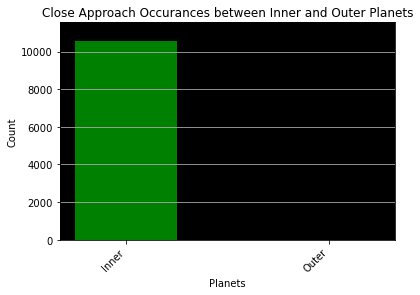

In [3]:
#Outer Planets Negligible
graphbyPlanetType(aDFLast20yr, "Close Approach Occurances between Inner and Outer Planets", "CpTypeAll")

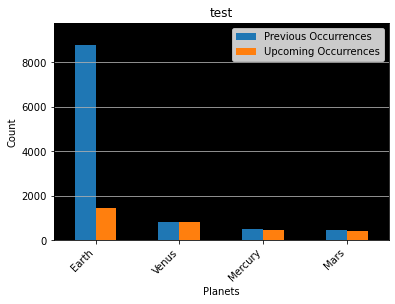

In [4]:
graphbyPlanetCompare(aDFLast20yr, aDFNext20yr, 'test', 'test')

In [5]:
df1 = TotCntByPlanet(aDFLast20yr)
df2 = TotCntByPlanet(aDFNext20yr)
Graphdf = df1.merge(df2, how='outer', on='Planets')
Graphdf = Graphdf.rename(columns={"Occurrences_x":"Previous Occurrences", "Occurrences_y":"Upcoming Occurrences"})
Graphdf = Graphdf[~Graphdf.index.isin(['Moon', 'Jupiter','Saturn','Uranus','Neptune'])]
Graphdf

,Previous Occurrences,Upcoming Occurrences
Planets,,
Earth,8778,1446.0
Venus,824,833.0
Mercury,479,472.0
Mars,471,408.0


Correlation Coefficient: 0.065116
Linear Regression Line: y = 0.08x + 19.12


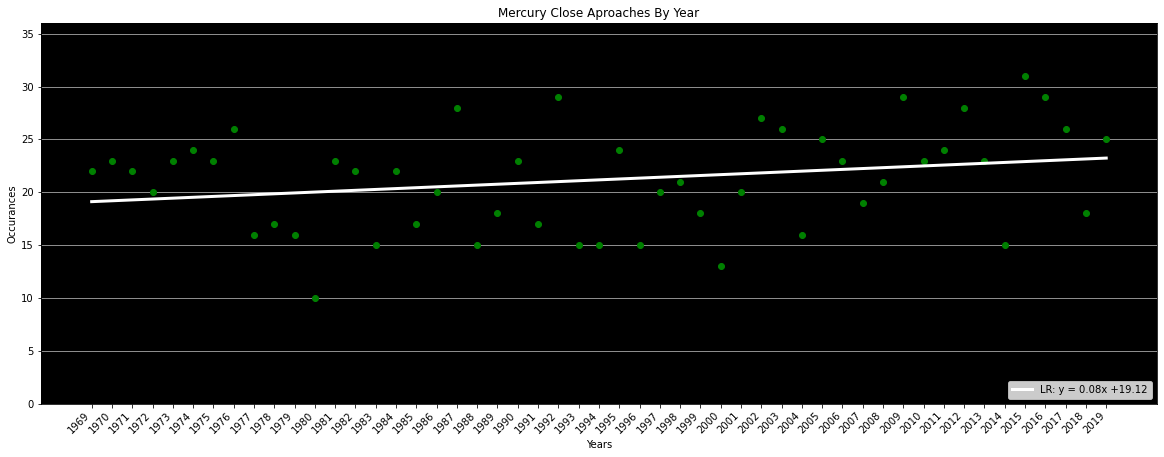

In [6]:
PlanetOcc(MercuryLast50yr,'Mercury Close Aproaches By Year','Merc50')

Correlation Coefficient: 0.200959
Linear Regression Line: y = 0.21x + 30.85


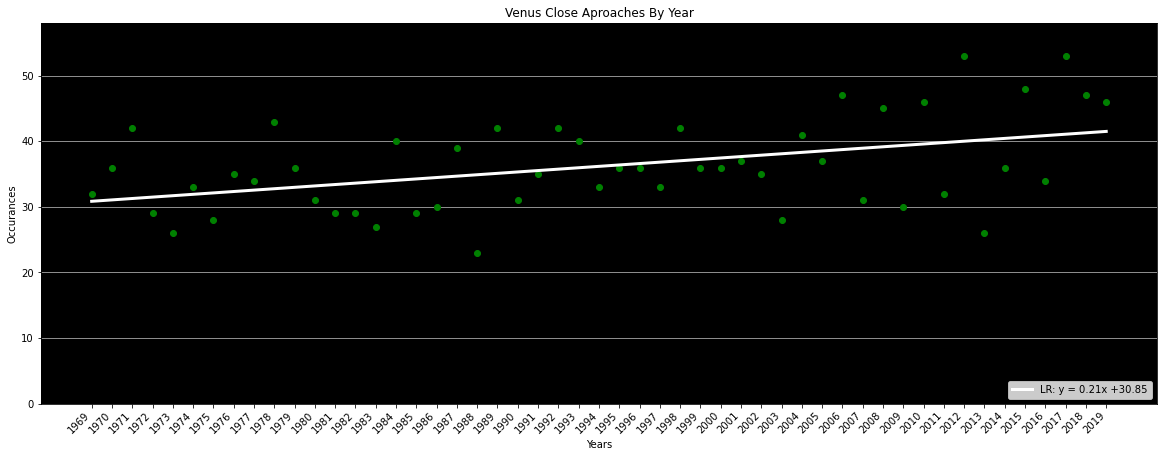

In [7]:
PlanetOcc(VenusLast50yr,'Venus Close Aproaches By Year','Venus50')

Correlation Coefficient: 0.551913
Linear Regression Line: y = 13.06x + -112.64


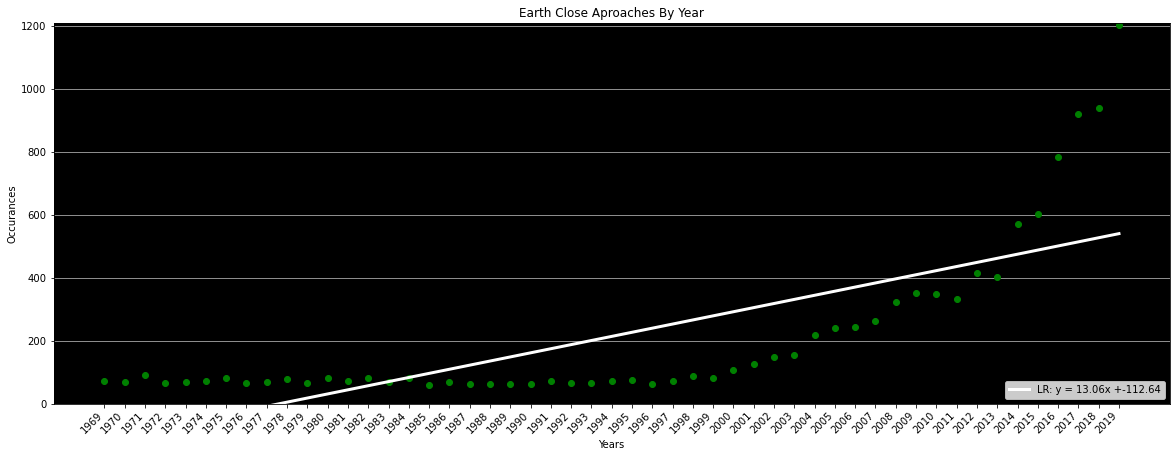

In [8]:
PlanetOcc(EarthLast50yr,'Earth Close Aproaches By Year','Earth50')

Correlation Coefficient: 0.150281
Linear Regression Line: y = 0.17x + 15.2


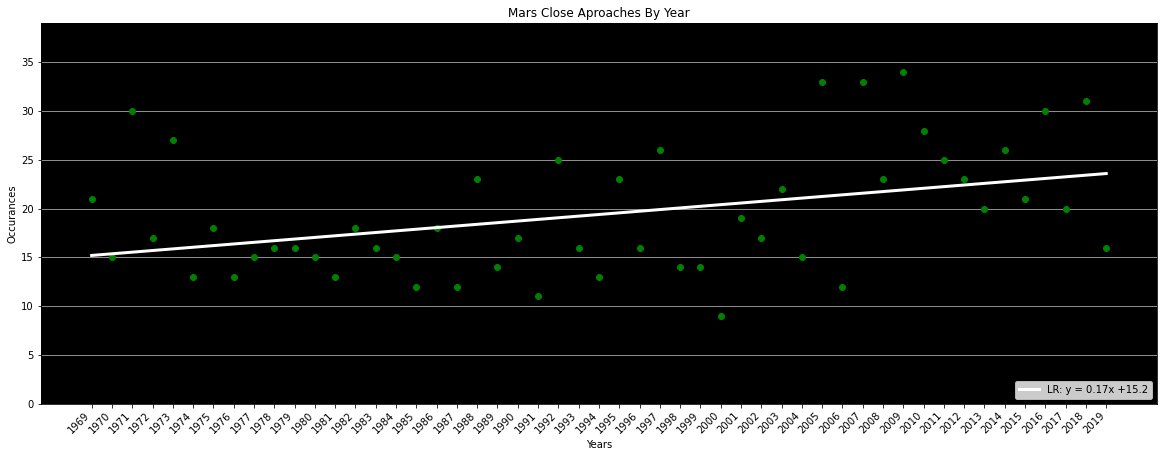

In [9]:
PlanetOcc(MarsLast50yr,'Mars Close Aproaches By Year','Mars50')